In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
with open('text_files/DATA_3Nov_1_20pm.TXT') as f:
    lines = f.readlines()

In [3]:
#La toma empieza en 36 (osea el dato 24) y termina en -8
num_samples = len(lines)
num_vars = 11

#lines = lines[0:-1]
data_array = np.zeros((num_vars, len(lines)))
time_list = []

for i in range(len(lines)):
  data = json.loads(lines[i])
  time = data.pop('Timestamp')
  time_list.append(time)
  lista = list(data.items())
  array = np.array(lista)[:, 1]
  data_array[:, i] = array

keys = list(data.keys())

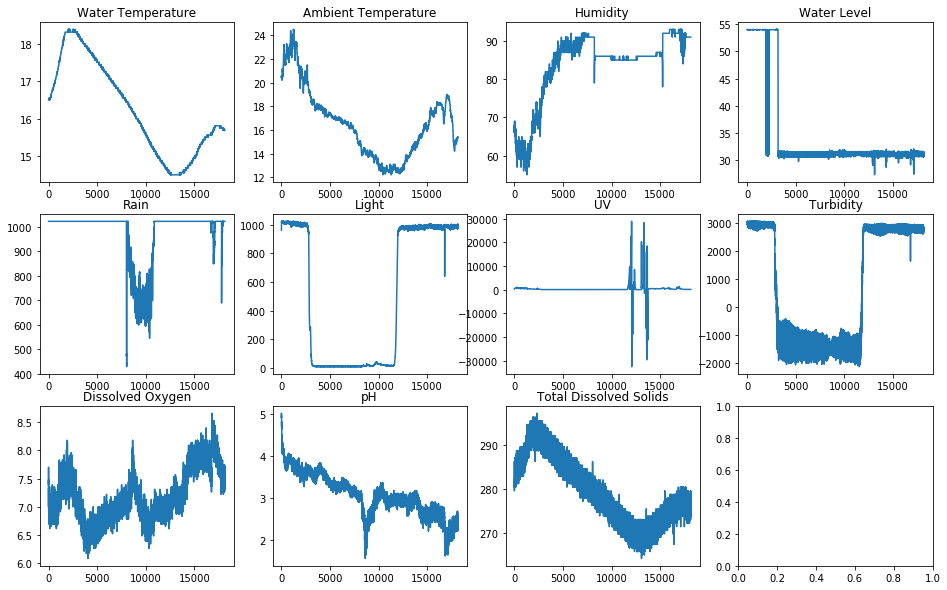

In [5]:
fig, axs = plt.subplots(3, 4, figsize = (16, 10))
axs = axs.flatten()

for i in range(num_vars):
  axs[i].plot(data_array[i, :], label = keys[i]);
  #axs[i].legend();
  axs[i].set_title(keys[i]);

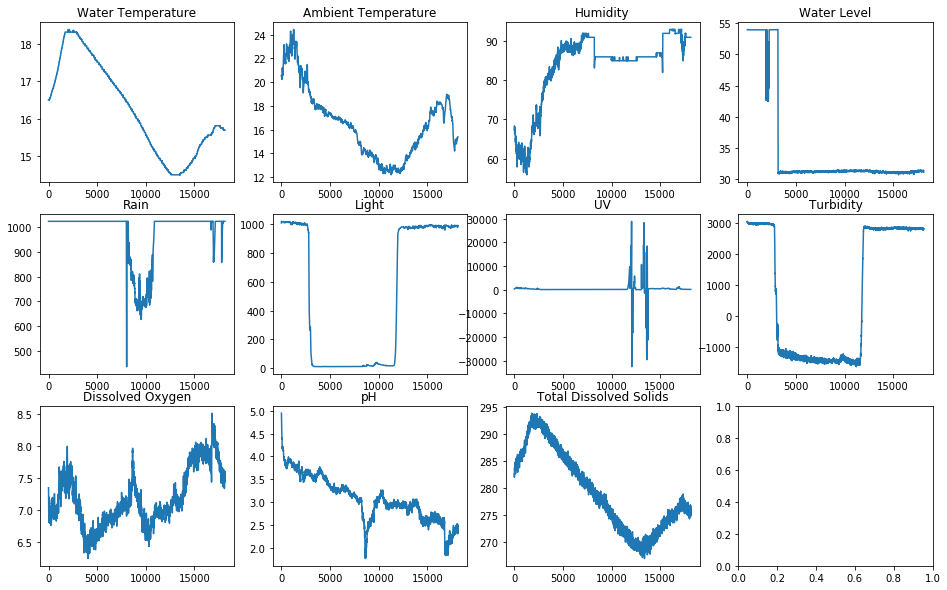

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fig, axs = plt.subplots(3, 4, figsize = (16, 10))
axs = axs.flatten()

for i in range(num_vars):
  axs[i].plot(moving_average(data_array[i, :], 12), label = keys[i]);
  #axs[i].legend();
  axs[i].set_title(keys[i]);

## Date Format

Data starts at `start_time_real`, set to time at which data was started.

In [7]:
formatted_time_list = []
start_time_real = datetime.strptime("03/11/21 13:20:32", '%d/%m/%y %H:%M:%S')
for i in range(len(time_list)):
    formatted_time_str = "01/10/21 "+time_list[i][3:]
    if i==0:
        start_time_data = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S')
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    else:
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    formatted_time_list.append(formatted_time)

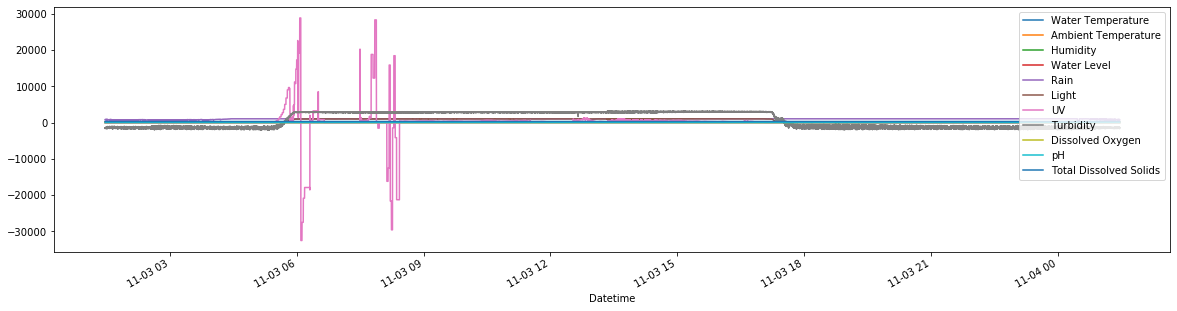

In [8]:
cols = list(data.keys())
list_data = list(data.items())

df_data = pd.DataFrame(np.transpose(data_array), columns=cols)
df_data['Datetime'] = formatted_time_list
df_data = df_data.set_index('Datetime')
df_data.plot(figsize=(20,5))

In [9]:
df_data.to_csv('formatted_data_nov03.csv')

In [10]:
df_data.tail()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids
Datetime,,,,,,,,,,,
2021-11-03 14:32:01,15.69,15.4,91.0,31.58,1023.0,997.0,85.0,2809.16,7.48,2.45,277.13
2021-11-03 14:32:06,15.69,15.4,91.0,30.62,1023.0,985.0,85.0,2819.34,7.48,2.51,273.83
2021-11-03 14:32:11,15.69,15.4,91.0,31.58,1023.0,999.0,85.0,2791.73,7.44,2.53,279.61
2021-11-03 14:32:16,15.69,15.4,91.0,30.61,1023.0,985.0,85.0,2826.02,7.48,2.62,273.83
2021-11-03 14:32:21,15.69,15.4,91.0,31.07,1023.0,997.0,80.0,2819.34,7.61,2.49,277.13


## Date Format and Offset for Datalogger Files

Data starts at `start_time_real`, set to time at which data was started.

In [5]:
df = pd.read_csv('datalogger_files/datos_datalogger_nov17.csv')
del df['Date']
del df['Time']
df.head()

,Datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L]
0,11/17/2021 12:07:06 p. m.,16.33,5.7,90.5,238.3,647,540,1.5,0.324,0.32,0,10.887,65.2,4.70
1,11/17/2021 12:07:11 p. m.,16.33,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,65.1,4.69
2,11/17/2021 12:07:16 p. m.,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,64.9,4.67
3,11/17/2021 12:07:21 p. m.,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.886,64.5,4.64
4,11/17/2021 12:07:26 p. m.,16.34,5.7,90.5,238.2,647,541,1.5,0.324,0.32,0,10.887,64.1,4.62


In [10]:
time_list = list(df['Datetime'].copy())
type(time_list)

list

In [7]:
formatted_time_list = []
start_time_real = datetime.strptime("03/11/21 13:20:32", '%d/%m/%y %H:%M:%S')
for i in range(len(time_list)):
    formatted_time_str = "01/10/21 "+time_list[i][3:]
    if i==0:
        start_time_data = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S')
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    else:
        formatted_time = datetime.strptime(formatted_time_str, '%d/%m/%y %H:%M:%S') - start_time_data + start_time_real
    formatted_time_list.append(formatted_time)

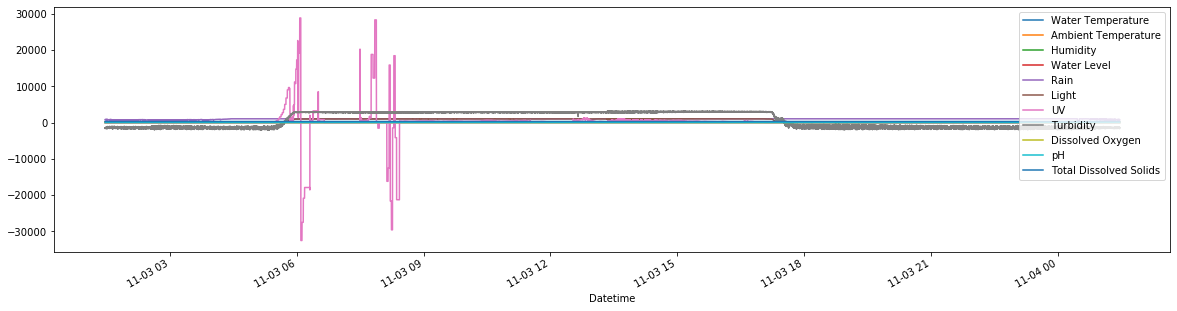

In [8]:
cols = list(data.keys())
list_data = list(data.items())

df_data = pd.DataFrame(np.transpose(data_array), columns=cols)
df_data['Datetime'] = formatted_time_list
df_data = df_data.set_index('Datetime')
df_data.plot(figsize=(20,5))

In [9]:
df_data.to_csv('formatted_data_nov03.csv')

In [10]:
df_data.tail()

,Water Temperature,Ambient Temperature,Humidity,Water Level,Rain,Light,UV,Turbidity,Dissolved Oxygen,pH,Total Dissolved Solids
Datetime,,,,,,,,,,,
2021-11-03 14:32:01,15.69,15.4,91.0,31.58,1023.0,997.0,85.0,2809.16,7.48,2.45,277.13
2021-11-03 14:32:06,15.69,15.4,91.0,30.62,1023.0,985.0,85.0,2819.34,7.48,2.51,273.83
2021-11-03 14:32:11,15.69,15.4,91.0,31.58,1023.0,999.0,85.0,2791.73,7.44,2.53,279.61
2021-11-03 14:32:16,15.69,15.4,91.0,30.61,1023.0,985.0,85.0,2826.02,7.48,2.62,273.83
2021-11-03 14:32:21,15.69,15.4,91.0,31.07,1023.0,997.0,80.0,2819.34,7.61,2.49,277.13
